Профессия Data Science  
Блок 5. Математика в ML. Часть I  
**MATH&ML-6. Математический анализ в контексте задачи оптимизации. Часть III**

---

## **✍ Оглавление:**

2. Градиентный спуск: применение и модификации
3. Метод Ньютона
4. Квазиньютоновские методы

## **2. Градиентный спуск: применение и модификации**

**Обратное распространение (backpropagation)** — это механизм, с помощью которого компоненты, влияющие на итоговый результат, итеративно корректируются для уменьшения функции стоимости.

Обычно выделяют три основных вариации градиентного спуска:

- Batch Gradient Descent;
- Stochastic Gradient Descent;
- Mini-batch Gradient Descent.

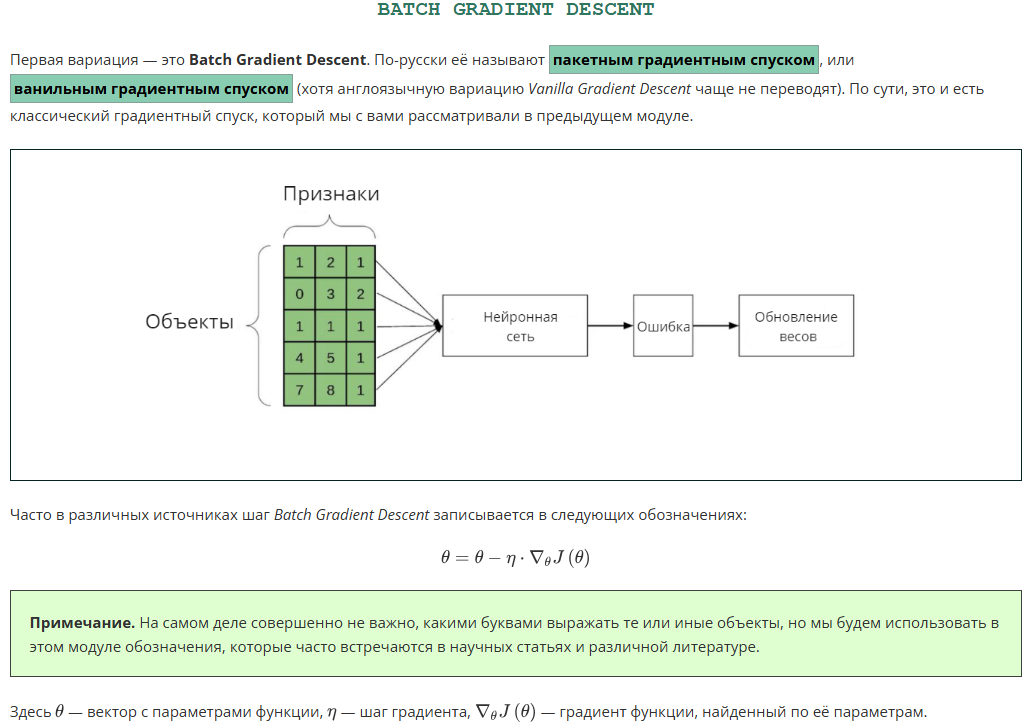

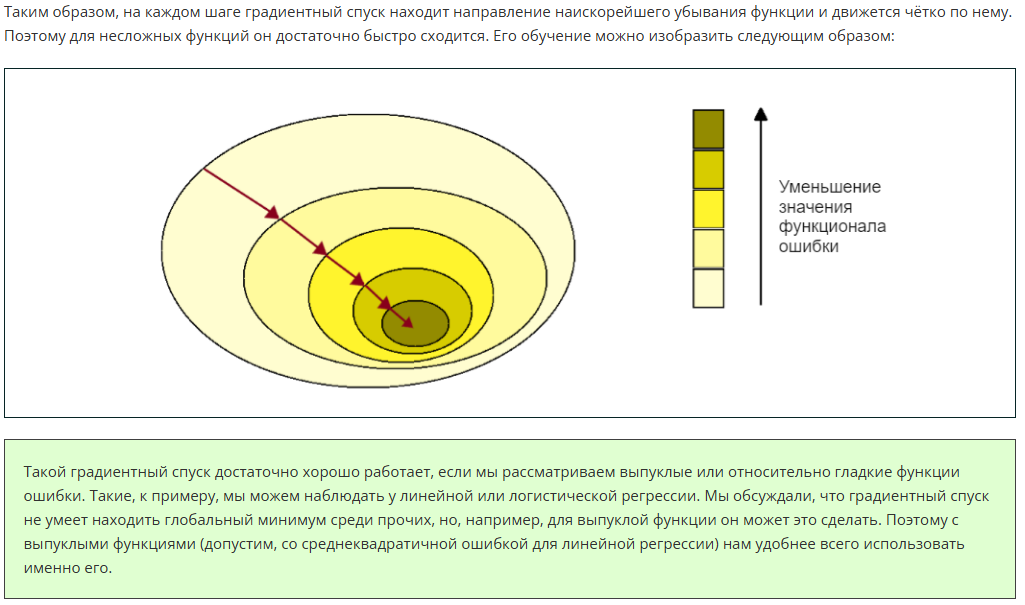

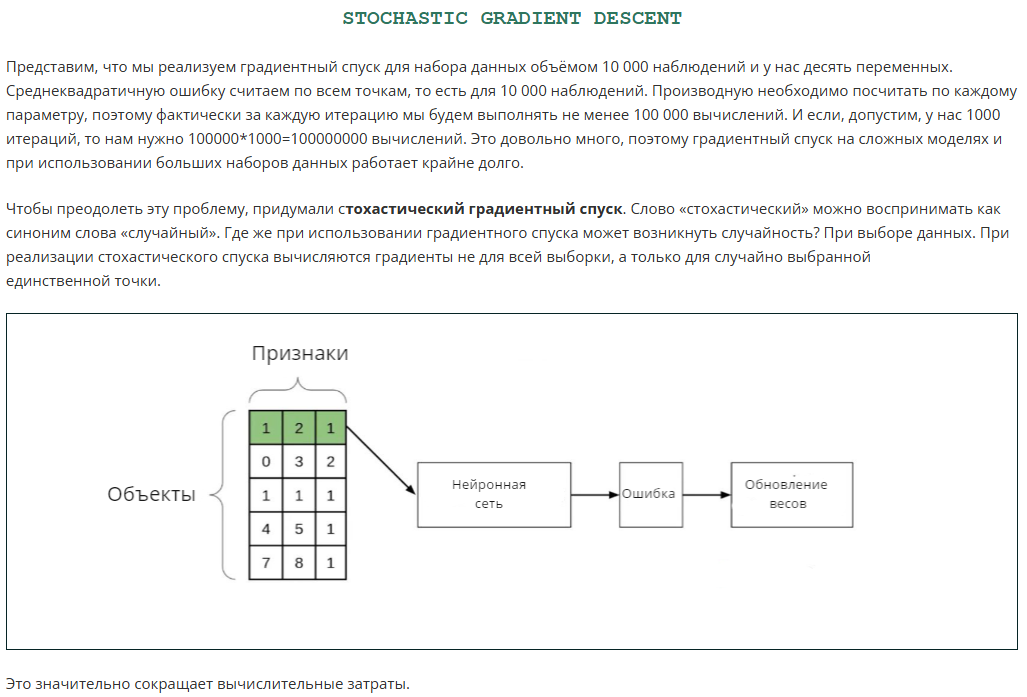

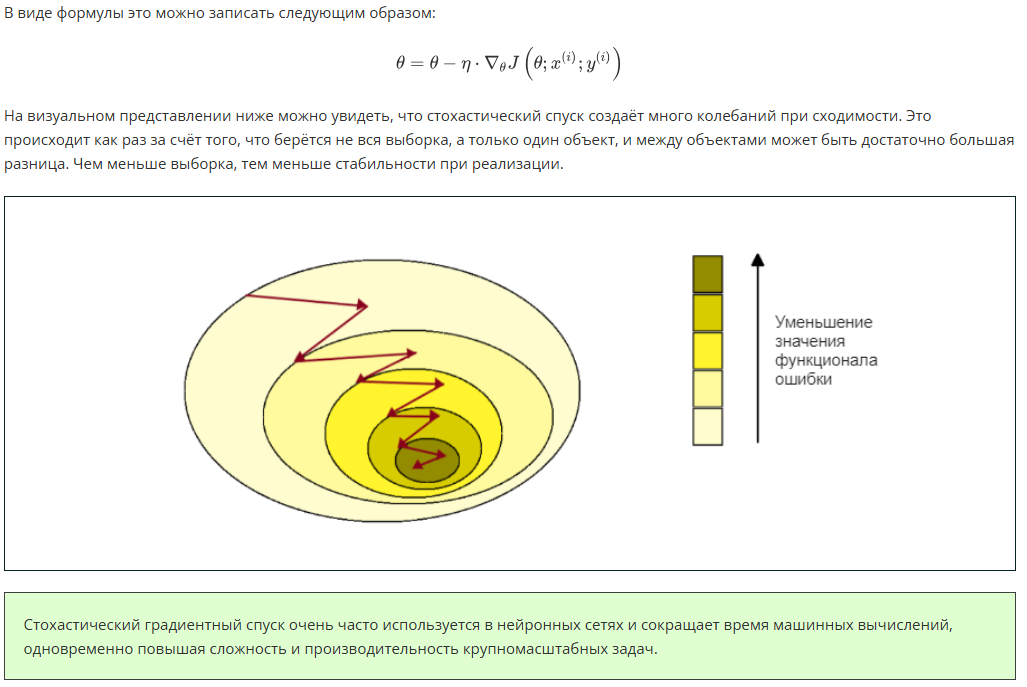

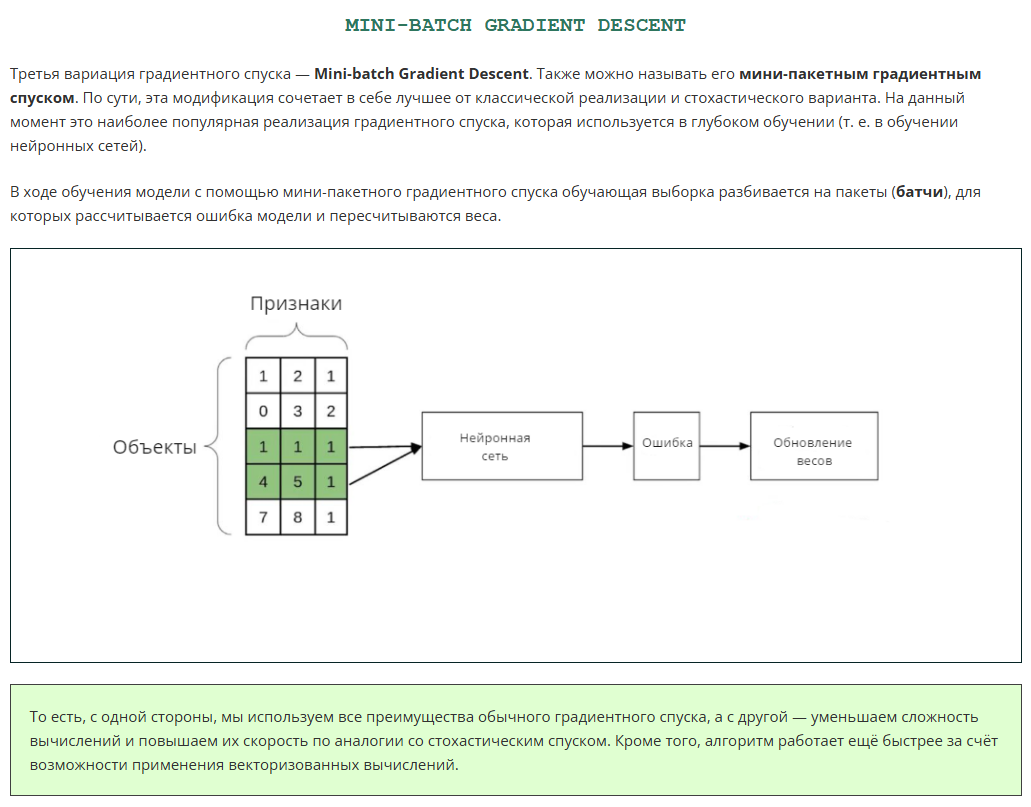

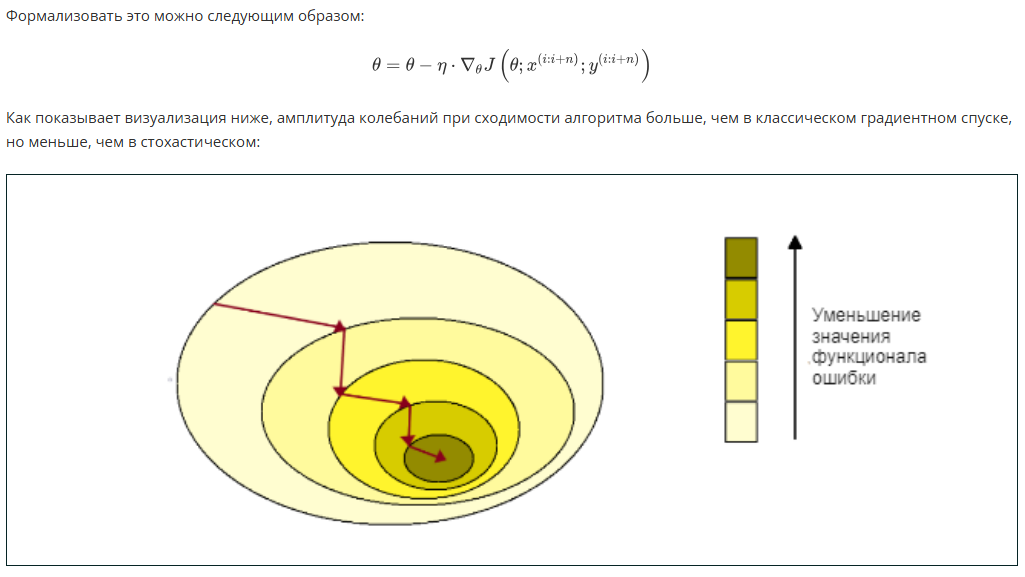

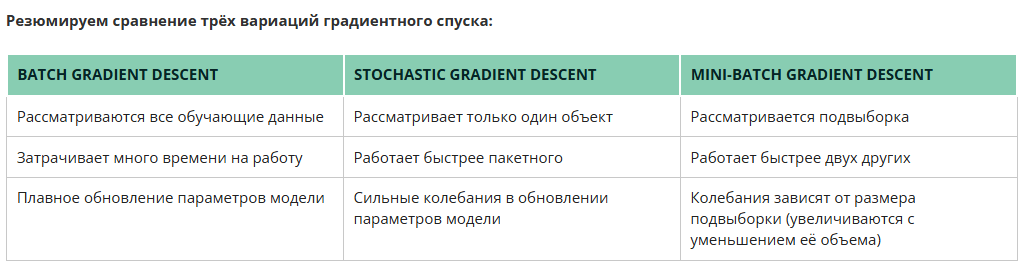

In [3]:
# Задание 2.7

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import pandas as pd
import numpy as np

df = sns.load_dataset('diamonds')

df.drop(['depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)

df['carat'] = np.log(1+df['carat'])
df['price'] = np.log(1+df['price'])

X_cols = [col for col in df.columns if col!='price']
X = df[X_cols]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

parameters = {
    "loss": ["squared_error", "epsilon_insensitive"],
    "penalty": ["elasticnet"],
    "alpha": np.logspace(-3, 3, 10),
    "l1_ratio": np.linspace(0, 1, 10),
    "learning_rate": ["constant"],
    "eta0": np.logspace(-4, -1, 4)
}

sgd = SGDRegressor(random_state=42)
sgd_cv = GridSearchCV(estimator=sgd, param_grid=parameters, n_jobs=-1)
sgd_cv.fit(X_train, y_train)

print(sgd_cv.best_params_)

sgd = SGDRegressor(**sgd_cv.best_params_, random_state = 42)

sgd.fit(X_train, y_train)
sgd.score(X_train, y_train) # r2
ls = sgd.predict(X_test)

round(mean_squared_error(y_test, ls), 3)

{'alpha': 0.001, 'eta0': 0.001, 'l1_ratio': 0.0, 'learning_rate': 'constant', 'loss': 'epsilon_insensitive', 'penalty': 'elasticnet'}


0.044

## **3. Метод Ньютона**

Метод Ньютона изначально появился как метод решения уравнений вида f(x) = 0.

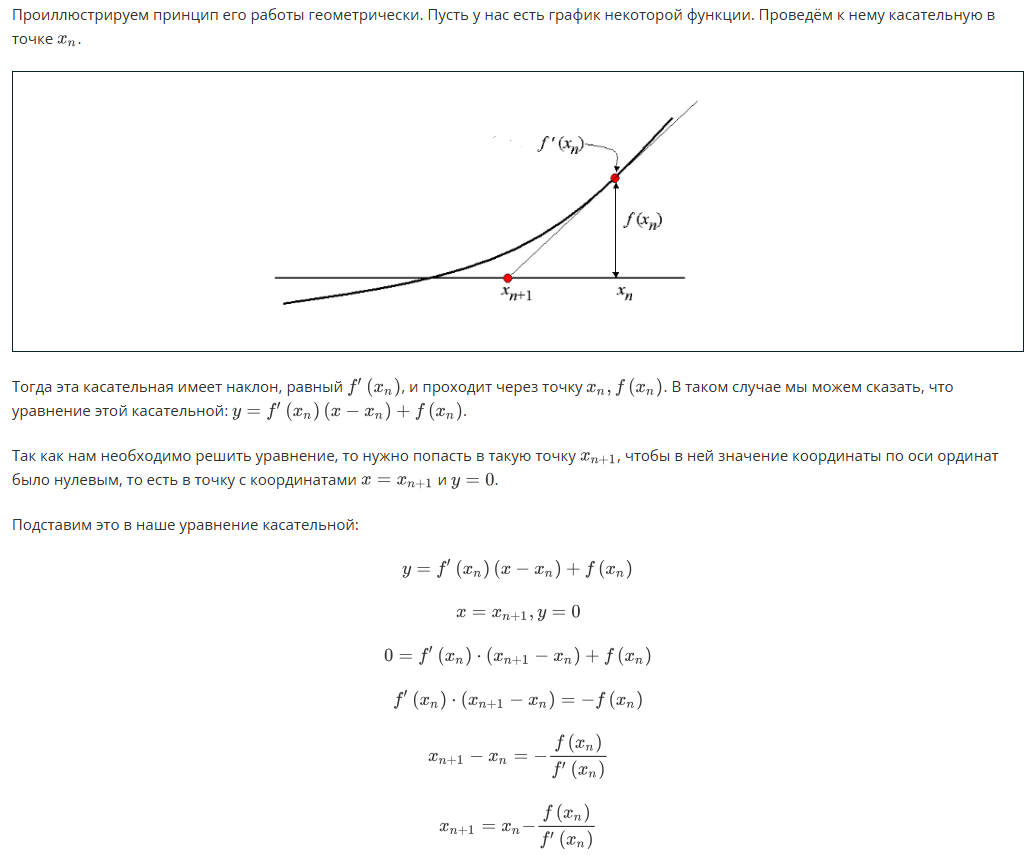

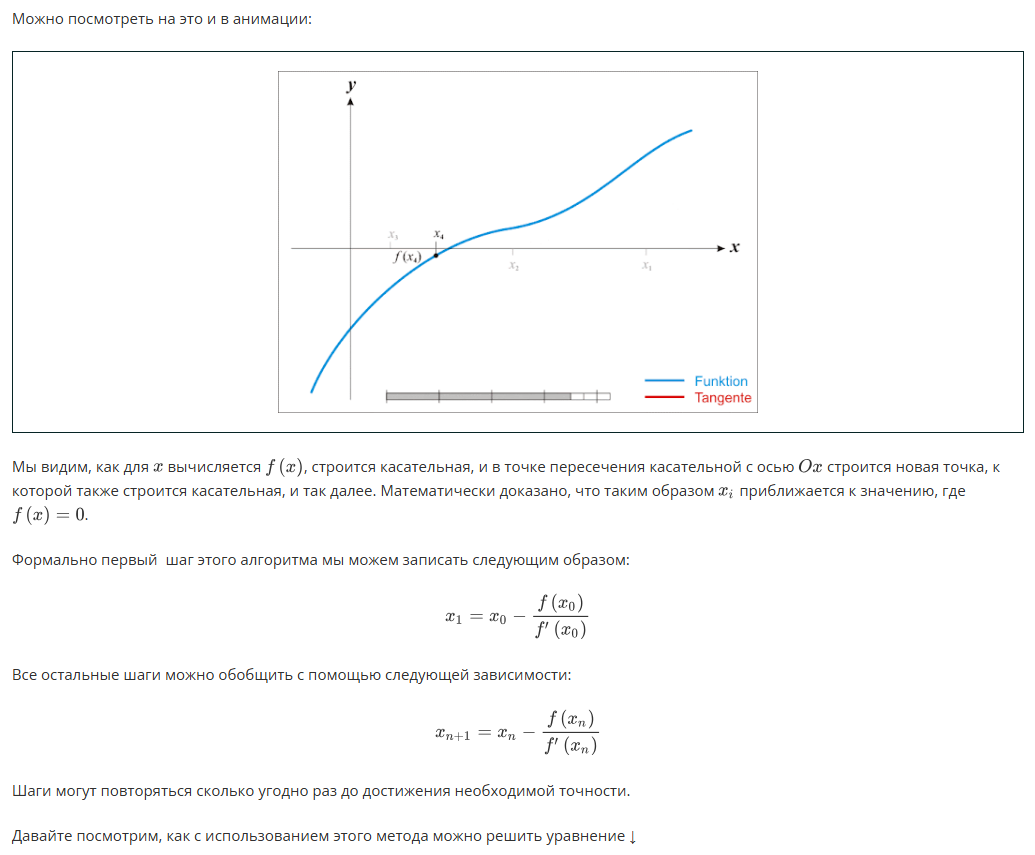

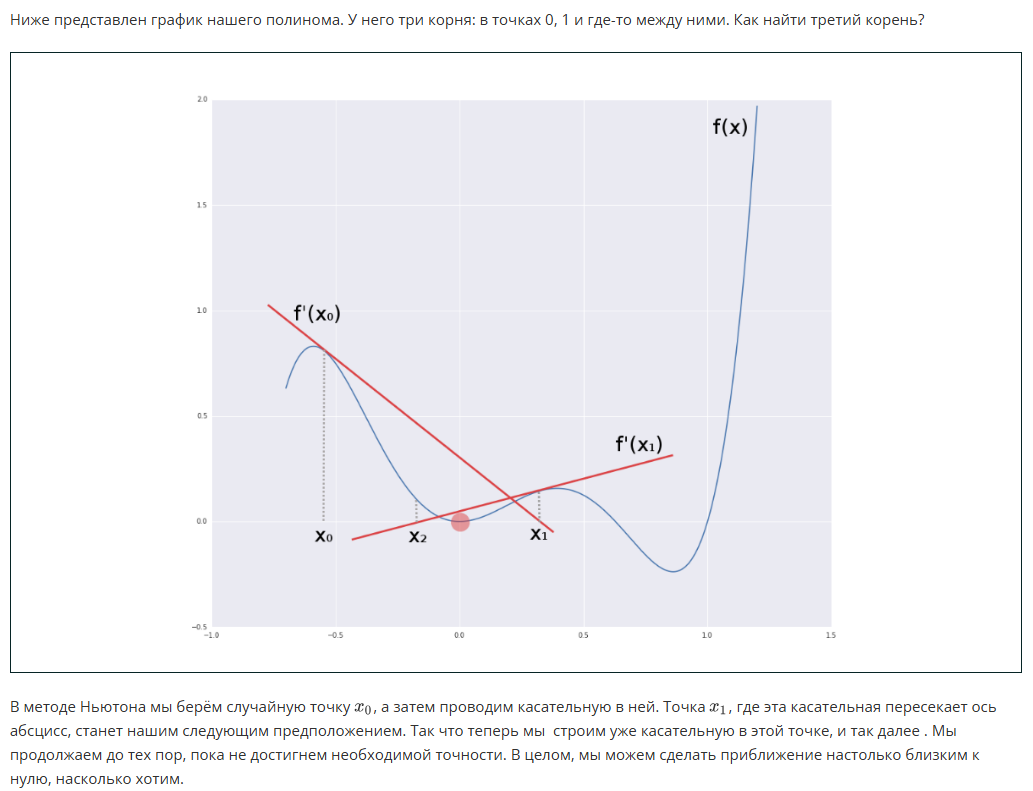

In [4]:
# Задание 3.1

def func1(x):
    return 6*x**5-5*x**4-4*x**3+3*x**2
 
def func2(x):
    return 30*x**4-20*x**3-12*x**2+6*x
init_value = 0.7
iter_count = 0
x_curr = init_value
epsilon = 0.000001
f = func1(x_curr)
 
while (abs(f) > epsilon):
    f = func1(x_curr)
    f_prime = func2(x_curr)
    x_curr = x_curr - (f)/(f_prime)
    iter_count += 1
    print(x_curr)
print(iter_count)

0.6296335078534031
0.6286680781673306
0.6286669787778999
0.6286669787764609
4


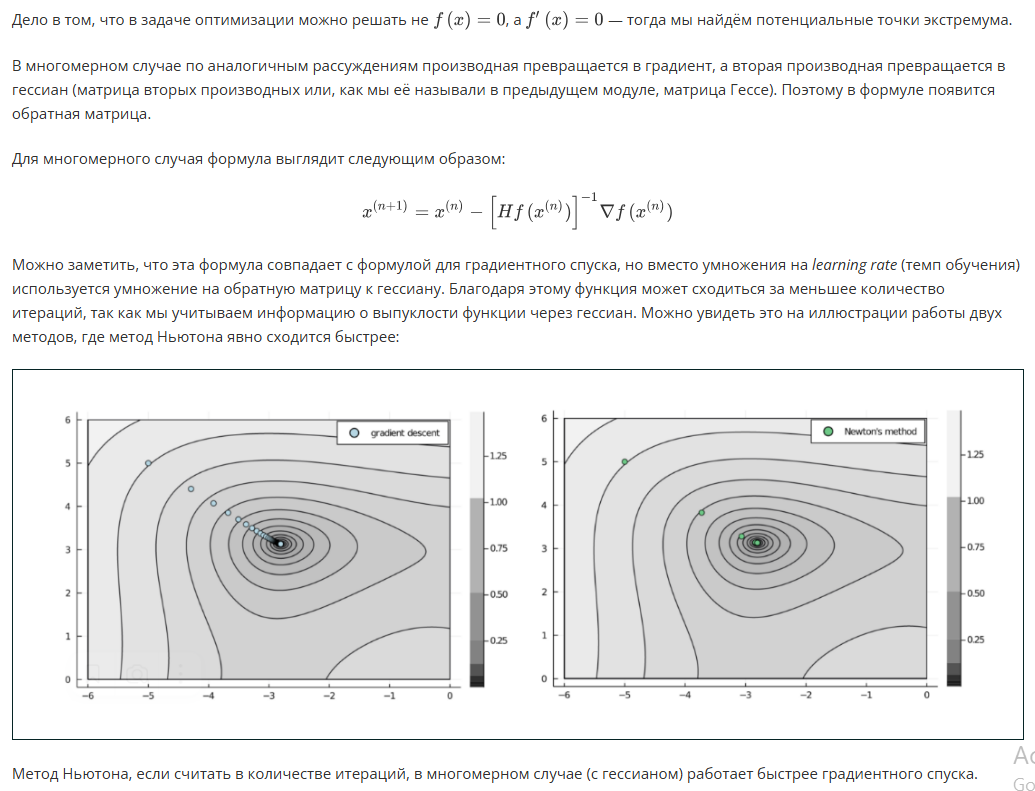

In [5]:
def func1(x):
    return 3*x**2 - 6*x -45
def func2(x):
    return 6*x - 6

initial_value = 42
iter_count = 0
x_curr = initial_value
epsilon = 0.0001
f = func1(x_curr)

while (abs(f) > epsilon):
    f = func1(x_curr)
    f_prime = func2(x_curr)
    x_curr = x_curr - (f)/(f_prime)
    iter_count += 1
    print(x_curr)

21.695121951219512
11.734125501243229
7.1123493600499685
5.365000391507974
5.015260627016227
5.000029000201801
5.000000000105126
5.000000000000001


In [6]:
def newtons_method(f, fprime, x0, tol=0.0001):
    iter_count = 0
    x_curr = x0
    f_val = f(x_curr)
    while (abs(f_val) > tol):
        f_val = f(x_curr)
        f_prime_val = fprime(x_curr)
        x_curr = x_curr - (f_val)/(f_prime_val)
        iter_count += 1
    return x_curr

newtons_method(f=func1, fprime=func2, x0=50, tol=0.0001)

5.0

In [7]:
# А можно воспользоваться реализацией из библиотеки scipy:

from scipy.optimize import newton
newton(func=func1, fprime=func2, x0=50, tol=0.0001)

5.0

In [10]:
# Задание 3.9

def func(x):
    return 8*x**3-2*x**2-450
def func1(x):
    return 24*x**2 - 4*x 
def func2(x):
    return 48*x -4
 
init_value = 42
iter_count = 0
x_curr = init_value
epsilon = 0.0001
f = func1(x_curr)
 
while (abs(f) > epsilon):
    f = func1(x_curr)
    f_prime = func2(x_curr)
    x_curr = x_curr - (f)/(f_prime)
    iter_count += 1
    print(x_curr)
 
print(round(x_curr, 3))
print(round(func(x_curr),3))

21.041749502982107
10.562707090133793
5.323351550447383
2.7040050774153417
1.3949941413301903
0.7418109325525483
0.41784523900811205
0.26096925221473555
0.19169814030401197
0.16955770984744145
0.1667151339969682
0.1666666807529666
0.16666666666666785
0.167
-450.019


## **4. Квазиньютоновские методы**

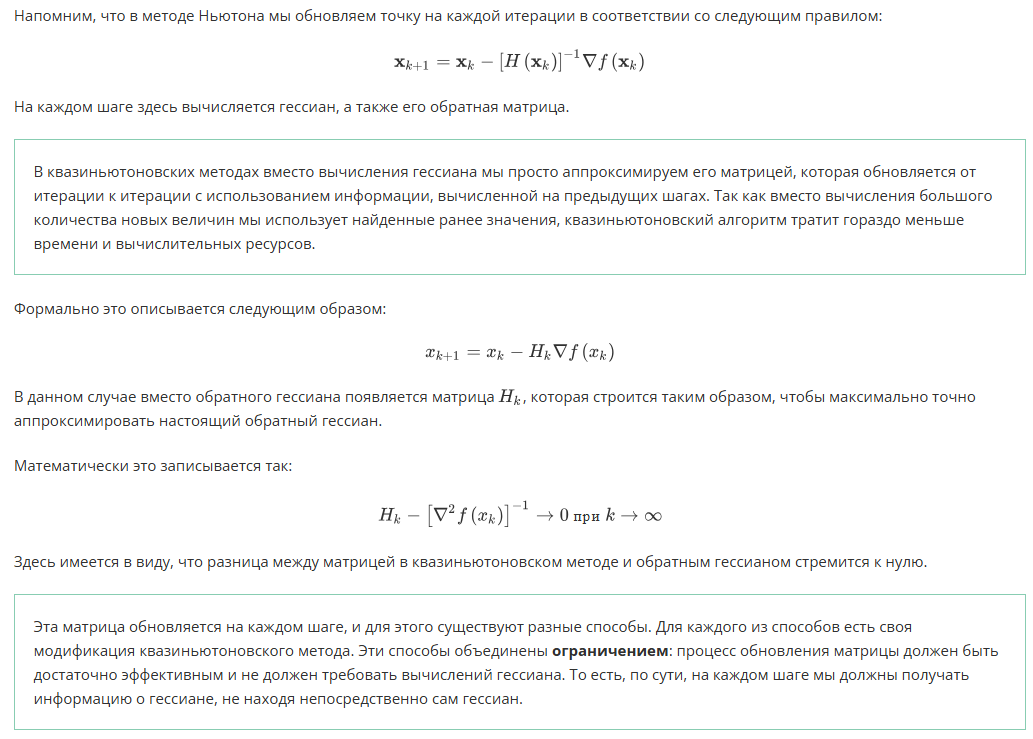

Три самые популярные схемы аппроксимации:

- симметричная коррекция ранга 1 (SR1);
- схема Дэвидона — Флетчера — Пауэлла (DFP);
- схема Бройдена — Флетчера — Гольдфарба — Шанно (BFGS).

Последняя схема (BFGS) самая известная, стабильная и считается наиболее эффективной. На ней мы и остановимся. Своё название она получила из первых букв фамилий создателей и исследователей данной схемы: Чарли Джорджа Бройдена, Роджера Флетчера, Дональда Гольдфарба и Дэвида Шанно.

У этой схемы есть две известных вариации:

- L-BFGS;
- L-BFGS-B.

Обе этих вариации необходимы в случае большого количества переменных для экономии памяти (так как во время их реализации хранится ограниченное количество информации). По сути, они работают одинаково, и L-BFGS-B является лишь улучшенной версией L-BFGS для работы с ограничениями.

Рассмотрим алгоритм применения этого метода.

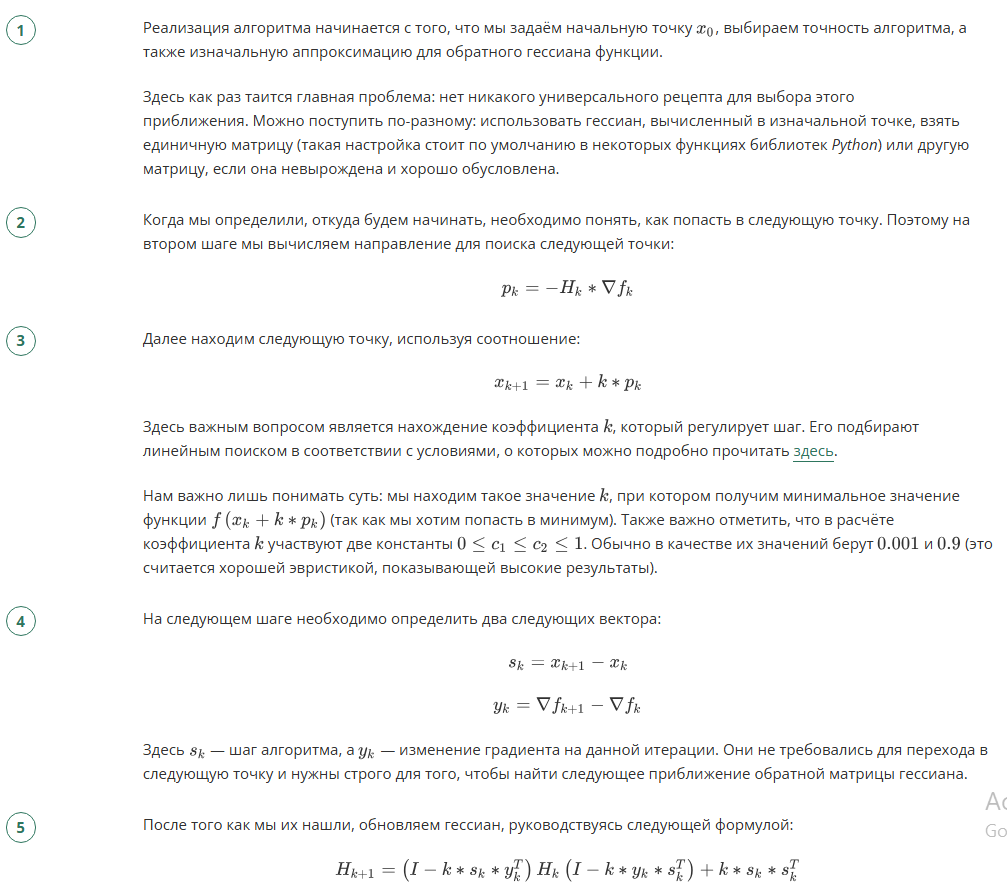

In [11]:
import numpy as np
from scipy.optimize import minimize
# Определим функцию, которую будем оптимизировать. Вместо отдельных  и  можно взять координаты единого вектора:

def func(x):
    return x[0]**2.0 + x[1]**2.0
# Теперь определим градиент для функции:

def grad_func(x):
    return np.array([x[0] * 2, x[1] * 2])
# Зададим начальную точку:

x_0 = [1.0, 1.0]
# Определим алгоритм:

result = minimize(func, x_0, method='BFGS', jac=grad_func)
# Выведем результаты:

print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %d' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

Статус оптимизации Optimization terminated successfully.
Количество оценок: 3
Решение: f([0. 0.]) = 0.00000


In [12]:
# определяем нашу функцию
def func(x):
    return x[0]**2.0 + x[1]**2.0
 
#  определяем градиент функции
def grad_func(x):
    return np.array([x[0] * 2, x[1] * 2])
 
# определяем начальную точку
x_0 = [1, 1]
# реализуем алгоритм L-BFGS-B
result = minimize(func, x_0, method='L-BFGS-B', jac=grad_func)
# получаем результат
print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %d' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

Статус оптимизации CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
Количество оценок: 3
Решение: f([0. 0.]) = 0.00000


In [1]:
# Задание 4.1

import numpy as np
from scipy.optimize import minimize

def func(x):
    return x[0] ** 2 - x[0] * x[1] + x[1] ** 2 + 9 * x[0] - 6 * x[1] + 20

def grad_func(x):
    return np.array([2 * x[0] - x[1] + 9, -x[0] + 2 * x[1] - 6])

x_0 = [-400, -400]
result = minimize(func, x_0, method='BFGS', jac=grad_func)
solution = result['x']
print(solution)

[-4.  1.]


In [2]:
# Задание 4.4

from scipy.optimize import minimize

def func(x):
    return x[0]**2.0 - 3*x[0] + 45

def grad_func(x):
    return 2*x[0]-3

x_0 = 10
result = minimize(func, x_0, method='BFGS', jac=grad_func)
print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %d' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

Статус оптимизации Optimization terminated successfully.
Количество оценок: 5
Решение: f([1.5]) = 42.75000


In [3]:
# Задание 4.5

x_0 = 10
result = minimize(func, x_0, method='L-BFGS-B', jac=grad_func)
print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %d' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

Статус оптимизации CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
Количество оценок: 3
Решение: f([1.5]) = 42.75000


In [4]:
# Задание 4.7

def func(x):
    return x[0]**4.0 + 6*x[1]**2.0 + 10
 
def grad_func(x):
    return np.array([4* x[0] ** 3, 12* x[1]])

x_0 = [100.0, 100.0]
result = minimize(func, x_0, method='BFGS', jac=grad_func)
print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %d' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

Статус оптимизации Optimization terminated successfully.
Количество оценок: 37
Решение: f([1.31617159e-02 6.65344582e-14]) = 10.00000


## **5. Линейное программирование**

**Линейное программирование** — это метод оптимизации для системы линейных ограничений и линейной целевой функции. Целевая функция определяет оптимизируемую величину, и цель линейного программирования состоит в том, чтобы найти значения переменных, которые максимизируют или минимизируют целевую функцию.

Линейное программирование полезно применять для многих задач, требующих оптимизации ресурсов:

- В производстве — чтобы рассчитать человеческие и технические ресурсы и минимизировать стоимость итоговой продукции.
- При составлении бизнес-планов — чтобы решить, какие продукты продавать и в каком количестве, чтобы максимизировать прибыль.
- В логистике — чтобы определить, как использовать транспортные ресурсы для выполнения заказов за минимальное время.
- В сфере общепита — чтобы составить расписание для официантов.

Задача линейного программирования — это задача оптимизации, в которой целевая функция и функции-ограничения линейны, а все переменные неотрицательны.

**Целочисленным линейным программированием (ЦЛП)** называется вариация задачи линейного программирования, когда все переменные — целые числа.

